## 复制带随机指针的链表
---
给定一个链表，每个节点包含一个额外增加的随机指针，该指针可以指向链表中的任何节点或空节点。  
要求返回这个链表的[深拷贝](https://baike.baidu.com/item/%E6%B7%B1%E6%8B%B7%E8%B4%9D/22785317?fr=aladdin)。
我们用一个由`n`个节点组成的链表来表示输入/输出中的链表。每个节点用一个 `[val, random_index]` 表示：
- `val`一个表示 `Node.val` 的整数。
- `random_index`：随机指针指向的节点索引（范围从 `0`到 `n-1`）；如果不指向任何节点，则为  `null` 。

**示例1：**  
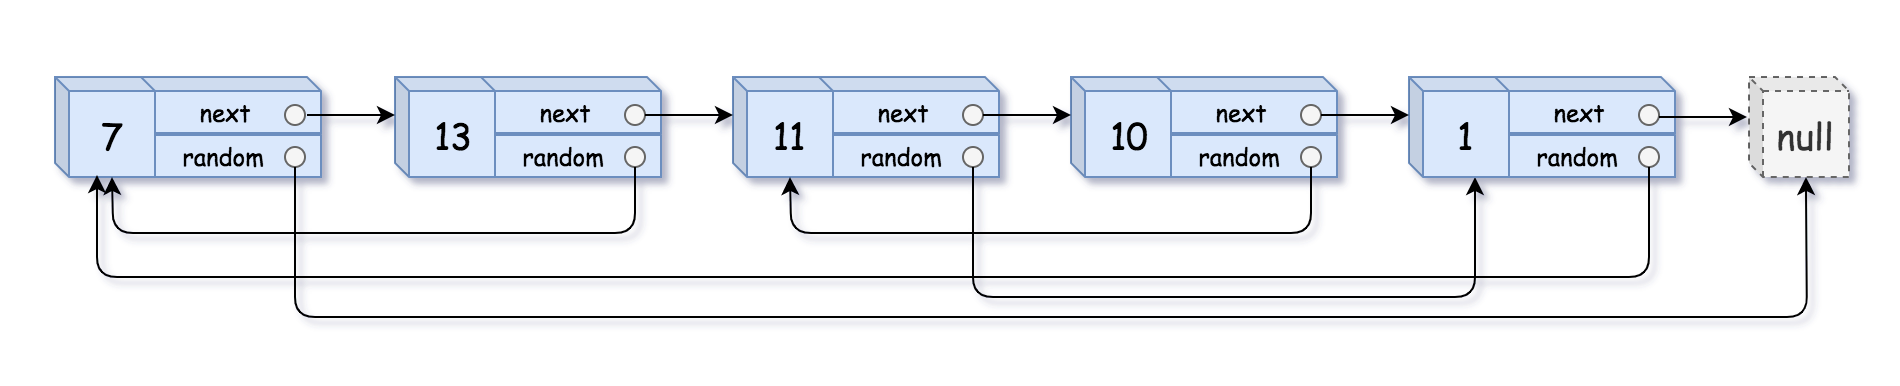

`输入:` head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
`输出：` [[7,null],[13,0],[11,4],[10,2],[1,0]]



**示例2：**
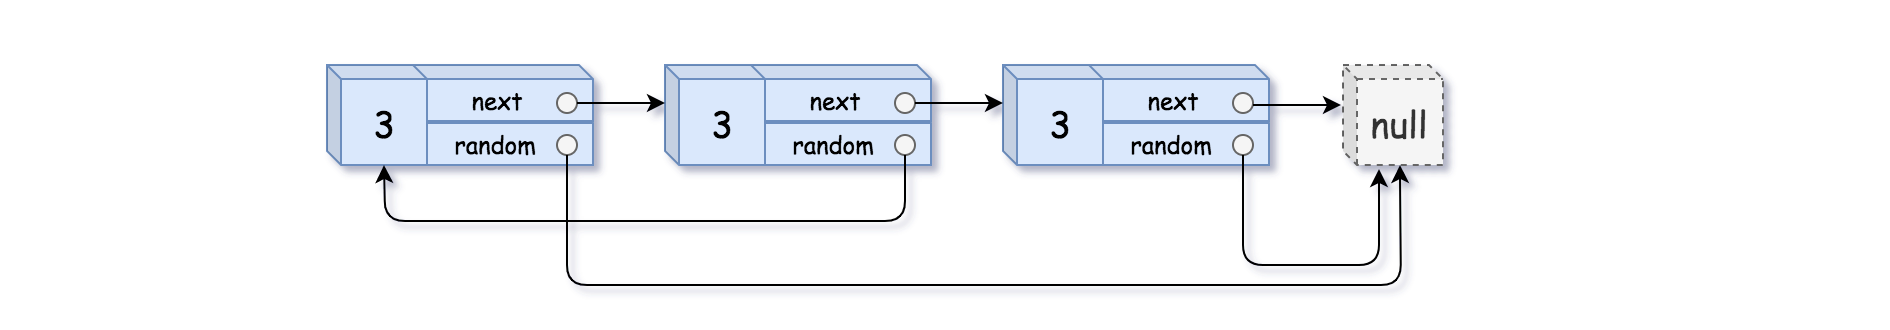

输入：head = [[1,1],[2,1]]
输出：[[1,1],[2,1]]

**示例 3：**
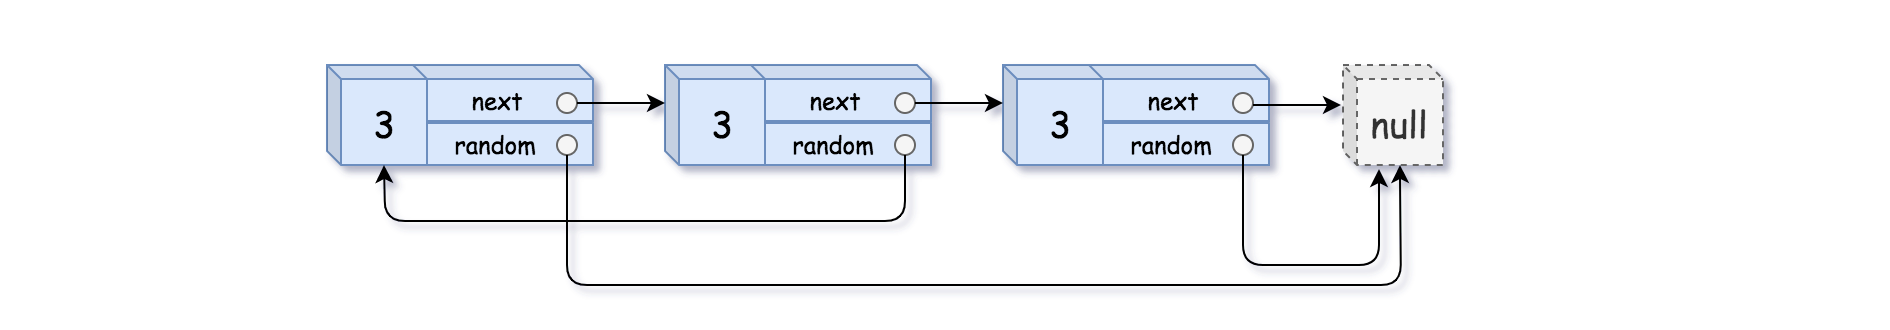

**示例 4：**
输入：head = []
输出：[]
解释：给定的链表为空（空指针），因此返回 null。

**提示：**

- -10000 <= Node.val <= 10000
- Node.random 为空（null）或指向链表中的节点。
- 节点数目不超过 1000 。

### 方法1：[回溯](https://leetcode-cn.com/problems/copy-list-with-random-pointer/solution/fu-zhi-dai-sui-ji-zhi-zhen-de-lian-biao-by-leetcod/)

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""
import copy
class Solution:
    def __init__(self):
        # Dictionary which holds old nodes as keys and new nodes as its values.
        self.visitedHash = {}

    def copyRandomList(self, head: 'Node') -> 'Node':
        if head is None:
            return head
        if head in self.visitedHash:
            return self.visitedHash[head]
        
        node = Node(head.val,None,None)
        self.visitedHash[head]=node
        node.next = self.copyRandomList(head.next)
        node.random=self.copyRandomList(head.random)
        return node

### 方法 2:$O(N)$ 空间的迭代

In [1]:
class Solution(object):
    def __init__(self):
        # Creating a visited dictionary to hold old node reference as "key" and new node reference as the "value"
        self.visited = {}

    def getClonedNode(self, node):
        # If node exists then
        if node:
            # Check if its in the visited dictionary          
            if node in self.visited:
                # If its in the visited dictionary then return the new node reference from the dictionary
                return self.visited[node]
            else:
                # Otherwise create a new node, save the reference in the visited dictionary and return it.
                self.visited[node] = Node(node.val, None, None)
                return self.visited[node]
        return None

    def copyRandomList(self, head):
        """
        :type head: Node
        :rtype: Node
        """

        if not head:
            return head

        old_node = head
        # Creating the new head node.       
        new_node = Node(old_node.val, None, None)
        self.visited[old_node] = new_node

        # Iterate on the linked list until all nodes are cloned.
        while old_node != None:

            # Get the clones of the nodes referenced by random and next pointers.
            new_node.random = self.getClonedNode(old_node.random)
            new_node.next = self.getClonedNode(old_node.next)

            # Move one step ahead in the linked list.
            old_node = old_node.next
            new_node = new_node.next

        return self.visited[head]


In [2]:
import numpy as np

In [3]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [4]:
import torch

In [33]:
in_features= torch.tensor([[1,2,3,4],[1,2,3,4]],dtype=torch.float32)

In [26]:
weight_matrix= torch.tensor(
    [[1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]],
    dtype=torch.float32
    
)

In [27]:
weight_matrix.matmul(in_features.T)

tensor([30., 40., 50.])

In [29]:
#in_features.transpose(1,0)

In [30]:
import torch.nn as nn

In [31]:
fv =nn.Linear(4,3)

In [34]:
fv(in_features)

tensor([[-1.6445, -1.2065, -0.8218],
        [-1.6445, -1.2065, -0.8218]], grad_fn=<AddmmBackward>)

In [35]:
fc=nn.Parameter(weight_matrix)

In [45]:
for name ,s in fv.named_parameters():
    print(name,'\t\t',s)
    break

weight 		 Parameter containing:
tensor([[ 0.0401,  0.0208, -0.4145, -0.1977],
        [-0.1308, -0.3592, -0.3203,  0.0382],
        [ 0.2615, -0.0512, -0.0453, -0.1073]], requires_grad=True)


In [46]:
s=[1,2,3,4]

In [47]:
s[-2:]

[3, 4]